# Cantor set
$T([a, b])=[a, a+(b-a) / 3] \cup[b-(b-a) / 3, b]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

In [2]:
def cantor_set(interval):
    a, b = interval
    frac = (b - a) / 3
    return ([a, a + frac], [b - frac, b])

In [3]:
ini_set = [0, 1]
number_iterations = 7

Building the cantor set.
This is done by building a list `cantor_iterations` that as its `n`-th element, contains the `n`-th iteration of the cantor set. This grows as $2^n$

In [4]:
cantor_iterations = list()
cantor_iterations.append([ini_set])

for n in range(number_iterations):
    sub_sets = list()
    for it in cantor_iterations[n]:
        for sub_it in cantor_set(it):
            sub_sets.append(sub_it)
    cantor_iterations.append(sub_sets)

Print out the answers

In [5]:
def print_interval(it):
    a, b = it
    return '[' + str(Fraction(a).limit_denominator()) + ', ' + str(Fraction(b).limit_denominator()) + ']'

def print_interval_union(its):
    union = ''
    for i in its:
        interval_printed = print_interval(i) + ' ∪ '
        union += interval_printed
    return union[:-3]

In [6]:
prev_it = None
for i, ls in enumerate(cantor_iterations[1:]):
    print("Iteration " + str(i) + ":\n")
    union = print_interval_union(ls)
    if prev_it is None:
        print("T(" + str(cantor_iterations[0][0]) + ") = " + union)
    else:
        print("T(" + prev_it + ") = " + union)
    prev_it = union
    print("\n")

Iteration 0:

T([0, 1]) = [0, 1/3] ∪ [2/3, 1]


Iteration 1:

T([0, 1/3] ∪ [2/3, 1]) = [0, 1/9] ∪ [2/9, 1/3] ∪ [2/3, 7/9] ∪ [8/9, 1]


Iteration 2:

T([0, 1/9] ∪ [2/9, 1/3] ∪ [2/3, 7/9] ∪ [8/9, 1]) = [0, 1/27] ∪ [2/27, 1/9] ∪ [2/9, 7/27] ∪ [8/27, 1/3] ∪ [2/3, 19/27] ∪ [20/27, 7/9] ∪ [8/9, 25/27] ∪ [26/27, 1]


Iteration 3:

T([0, 1/27] ∪ [2/27, 1/9] ∪ [2/9, 7/27] ∪ [8/27, 1/3] ∪ [2/3, 19/27] ∪ [20/27, 7/9] ∪ [8/9, 25/27] ∪ [26/27, 1]) = [0, 1/81] ∪ [2/81, 1/27] ∪ [2/27, 7/81] ∪ [8/81, 1/9] ∪ [2/9, 19/81] ∪ [20/81, 7/27] ∪ [8/27, 25/81] ∪ [26/81, 1/3] ∪ [2/3, 55/81] ∪ [56/81, 19/27] ∪ [20/27, 61/81] ∪ [62/81, 7/9] ∪ [8/9, 73/81] ∪ [74/81, 25/27] ∪ [26/27, 79/81] ∪ [80/81, 1]


Iteration 4:

T([0, 1/81] ∪ [2/81, 1/27] ∪ [2/27, 7/81] ∪ [8/81, 1/9] ∪ [2/9, 19/81] ∪ [20/81, 7/27] ∪ [8/27, 25/81] ∪ [26/81, 1/3] ∪ [2/3, 55/81] ∪ [56/81, 19/27] ∪ [20/27, 61/81] ∪ [62/81, 7/9] ∪ [8/9, 73/81] ∪ [74/81, 25/27] ∪ [26/27, 79/81] ∪ [80/81, 1]) = [0, 1/243] ∪ [2/243, 1/81] ∪ [2/81, 7/243] ∪ [8/243, 1

Length of each interval

In [7]:
def iteration_len(it):
    sum_val = 0
    for i in it:
        a, b = i
        sum_val += b - a
    return sum_val

In [8]:
headers = ["Iteration", "Interval Length", "(2/3)^n", "Difference"]
rows = list()

for i, ls in enumerate(cantor_iterations):
    rows.append([i, iteration_len(ls), (2/3)**i, iteration_len(ls) - (2/3)**i])
    
# Calculate column widths for formatting
col_widths = [max(len(str(item)) for item in col) for col in zip(headers, *rows)]

# Create a formatted row function
def format_row(row):
    return " | ".join(f"{item:<{col_widths[i]}}" for i, item in enumerate(row))

# Print the table
print(format_row(headers))
print("-" * (sum(col_widths) + 4 * (len(headers) - 1)))
for row in rows:
    print(format_row(row))

Iteration | Interval Length     | (2/3)^n             | Difference             
----------------------------------------------------------------------------------
0         | 1                   | 1.0                 | 0.0                    
1         | 0.6666666666666665  | 0.6666666666666666  | -1.1102230246251565e-16
2         | 0.4444444444444443  | 0.4444444444444444  | -1.1102230246251565e-16
3         | 0.29629629629629606 | 0.2962962962962962  | -1.6653345369377348e-16
4         | 0.1975308641975304  | 0.19753086419753083 | -4.163336342344337e-16 
5         | 0.13168724279835348 | 0.13168724279835387 | -3.885780586188048e-16 
6         | 0.08779149519890134 | 0.08779149519890257 | -1.2351231148954867e-15
7         | 0.05852766346593685 | 0.05852766346593505 | 1.8041124150158794e-15 


Plot the sets

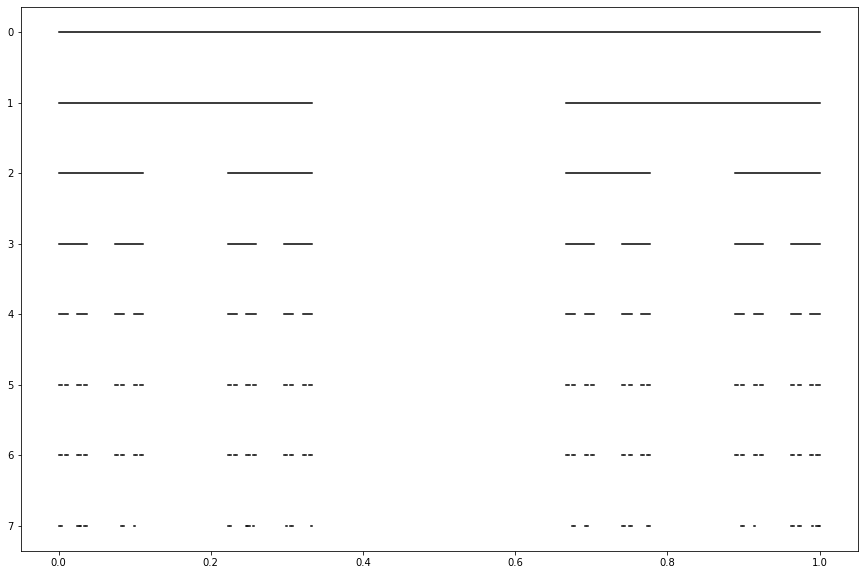

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.gca().invert_yaxis()
for i, ls in enumerate(cantor_iterations):
    for it in ls:
        ax.plot(it, np.ones(2)*i, color='black')